# ABEL collider tracking example

By Carl A. Lindstrøm (University of Oslo), 8 Sep 2023

### Import ABEL framework and required classes

In [1]:
from abel import *
import numpy as np
import scipy.constants as SI
%load_ext autoreload
%autoreload 2

### Define electron linac (PWFA)

In [2]:
# define driver
driver_source = SourceBasic()
driver_source.charge = -2.7e10 * SI.e # [C]
driver_source.energy = 0.15e9 # [eV]
driver_source.rel_energy_spread = 0.01
driver_source.bunch_length = 42e-6 # [m]
driver_source.z_offset = 300e-6 # [m]
driver_source.emit_nx, driver_source.emit_ny = 10e-6, 10e-6 # [m rad]
driver_source.beta_x, driver_source.beta_y = 30e-3, 30e-3 # [m]
driver_source.num_particles = 5000
driver_source.wallplug_efficiency = 0.5

# define driver accelerator
#driver_accel = RFAcceleratorBasic()
driver_accel = RFAcceleratorCLICopti()
driver_accel.nom_energy_gain = 31.1e9 # [eV]
driver_accel.nom_accel_gradient = 10e6 # [V/m]

# define driver complex
driver_complex = DriverComplex()
driver_complex.source = driver_source
driver_complex.rf_accelerator = driver_accel
driver_complex.turnaround = TurnaroundBasic()

# define stage
stage = StageBasic()
stage.driver_source = driver_complex
stage.nom_accel_gradient = 2e9 # [m]
stage.plasma_density = 1e21 # [m^-3]
stage.ramp_beta_mag = 5

# define beam
esource = SourceBasic()
esource.charge = -1e10 * SI.e # [C]
esource.energy = 5e9 # [eV]
esource.rel_energy_spread = 0.01
esource.bunch_length = 18e-6 # [m]
esource.z_offset = -34e-6 # [m]
esource.emit_nx, esource.emit_ny = 160e-6, 0.56e-6 # [m rad]
esource.beta_x = stage.matched_beta_function(esource.energy)
esource.beta_y = esource.beta_x
esource.num_particles = 1000
esource.wallplug_efficiency = 0.1
esource.accel_gradient = 25e6 # [V/m]

# define interstage
interstage = InterstageBasic()
interstage.beta0 = lambda E: stage.matched_beta_function(E)
interstage.dipole_length = lambda E: 1 * np.sqrt(E/10e9) # [m(eV)]
interstage.dipole_field = 0.5 # [T]

# define electron BDS
ebds = BeamDeliverySystemBasic()
ebds.beta_x, ebds.beta_y = 3.3e-3, 0.1e-3 # [m]
ebds.bunch_length = 0.75 * ebds.beta_y

# define electron linac
elinac = PlasmaLinac()
elinac.driver_complex = driver_complex
elinac.source = esource
elinac.stage = stage
elinac.interstage = interstage
elinac.bds = ebds
elinac.num_stages = 16

### Define the positron linac (RF)

In [3]:
# define positron source
psource = SourceBasic()
psource.charge = 4e10 * SI.e # [C]
psource.energy = 60e6 # [eV]
psource.rel_energy_spread = 0.0015
psource.bunch_length = 75e-6 # [m]
psource.emit_nx, psource.emit_ny = 1e-2, 1e-2 # [m rad]
psource.beta_x = 10 # [m]
psource.beta_y = 10 # [m]
psource.num_particles = esource.num_particles
psource.wallplug_efficiency = 0.5
psource.accel_gradient = 25e6 # [V/m]

# injector
pinjector = RFAcceleratorBasic()
pinjector.nom_accel_gradient = 25e6 # [V/m]
pinjector.nom_energy_gain = 2.80e9 # [V/m]

# damping ring
damping_ring = DampingRingBasic()
damping_ring.emit_nx_target = 10e-6 # [m rad]
damping_ring.emit_ny_target = 0.035e-6 # [m rad]

# define RF accelerator
#paccel = RFAcceleratorBasic()
paccel = RFAcceleratorCLICopti()
paccel.nom_accel_gradient = 25e6 # [V/m]

pturnaround = TurnaroundBasic()

# define positron BDS
pbds = BeamDeliverySystemBasic()
pbds.beta_x = 3.3e-3 # [m]
pbds.beta_y = 0.1e-3 # [m]

# define positron linac
plinac = ConventionalLinac()
plinac.rf_injector = pinjector
plinac.damping_ring = damping_ring
plinac.source = psource
plinac.rf_accelerator = paccel
#plinac.turnaround = pturnaround
plinac.bds = pbds

### Define the IP and collider

In [4]:
# define interaction point
#ip = InteractionPointGuineaPig()
ip = InteractionPointBasic()

# define collider (with two different linacs)
collider = Collider()
collider.linac1 = elinac
collider.linac2 = plinac
collider.ip = ip
collider.com_energy = 250e9
collider.energy_asymmetry = 2.5
collider.bunch_separation = 80e-9 # [s]
collider.num_bunches_in_train = 200
collider.rep_rate_trains = 100 # [Hz]

### Perform collider tracking

In [5]:
# track particles
collider.run('collider_example', num_shots=1, overwrite=True);

>> LINAC #1
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  1.0%, ε = 160.1/0.5 mm-mrad
    ... #1  StageBasic #1           (s =  209.6 m) :   E =  24.2 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.2%, ε = 160.2/0.5 mm-mrad
    ... #2  InterstageBasic         (s =  217.1 m) :   E =  24.2 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.2%, ε = 160.1/0.5 mm-mrad
    ... #3  StageBasic #2           (s =  226.7 m) :   E =  43.4 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.1%, ε = 160.3/0.5 mm-mrad
    ... #4  InterstageBasic         (s =  236.6 m) :   E =  43.4 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.1%, ε = 160.3/0.5 mm-mrad
    ... #5  StageBasic #3           (s =  246.3 m) :   E =  62.7 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.1%, ε = 160.3/0.5 mm-mrad
    ... #6  InterstageBasic         (s =  258.2 m) :   E =  62.7 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.1%, ε = 160.3/0.5 mm-mrad
    ... #7  StageBasic #4           (s =  267.8 m) :   E 

In [6]:
collider.print_cost()

-- COSTS -----------------------------------------
-- Construction: 4585 MILCU
   -- PlasmaLinac: 2766 MILCU
      -- Source: 50 MILCU
      -- Driver complex: 2444 MILCU
         -- Source: 50 MILCU
         -- RF accelerator: 2132 MILCU
            -- Instrumented beamline (29%): 36 MILCU
            -- RF structures (1841x): 254 MILCU
            -- Klystrons and modulators (1842x, 14.0 kW avg per): 1842 MILCU
         -- Turnaround: 22 MILCU
         -- Civil construction: 239 MILCU
      -- Plasma stages (16x): 31 MILCU
      -- Interstages: 26 MILCU
      -- BDS: 72 MILCU
      -- Civil construction: 144 MILCU
   -- ConventionalLinac: 1634 MILCU
      -- Source: 50 MILCU
      -- RF injector: 46 MILCU
         -- Instrumented beamline (29%): 1 MILCU
         -- RF structures (159x): 13 MILCU
         -- Klystrons and modulators (32x, 180.0 kW avg per): 32 MILCU
      -- Damping ring: 54 MILCU
         -- Ring components: 25 MILCU
         -- Civil construction: 29 MILCU
      -- 

In [7]:
#collider.print_power()
collider.linac1.driver_complex.wallplug_power()

25971214.88578974

In [8]:
collider.print_emissions()

-- EMISSIONS ------------------------------------
>> Construction emissions (9.6 km): 61 kton CO2e
>> Operation emissions (5.8 TWh):   117 kton CO2e
-------------------------------------------------
>> Total emissions:                 178 kton CO2e
-------------------------------------------------


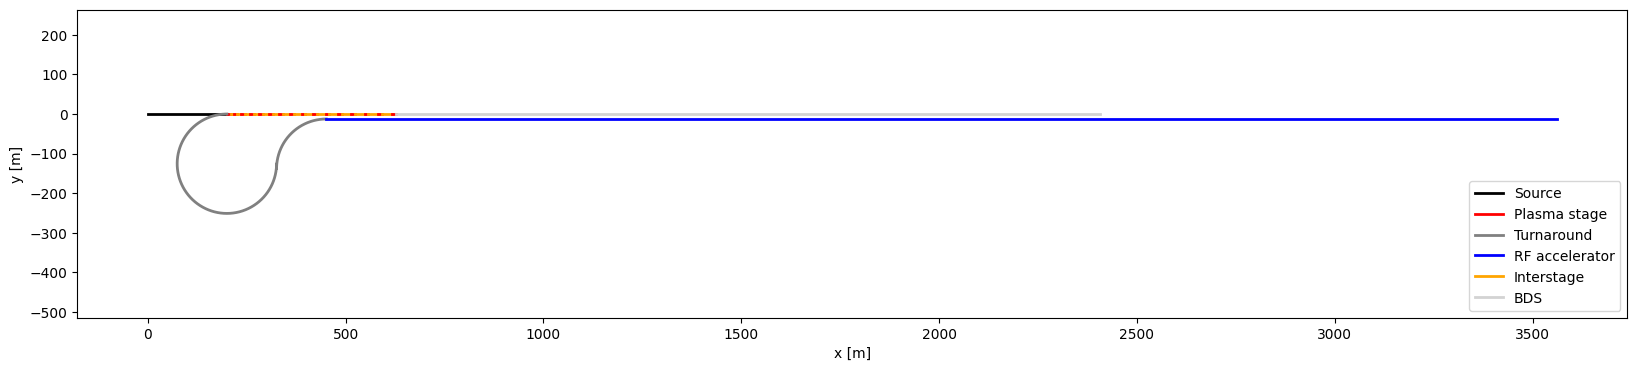

In [9]:
collider.linac1.plot_survey()

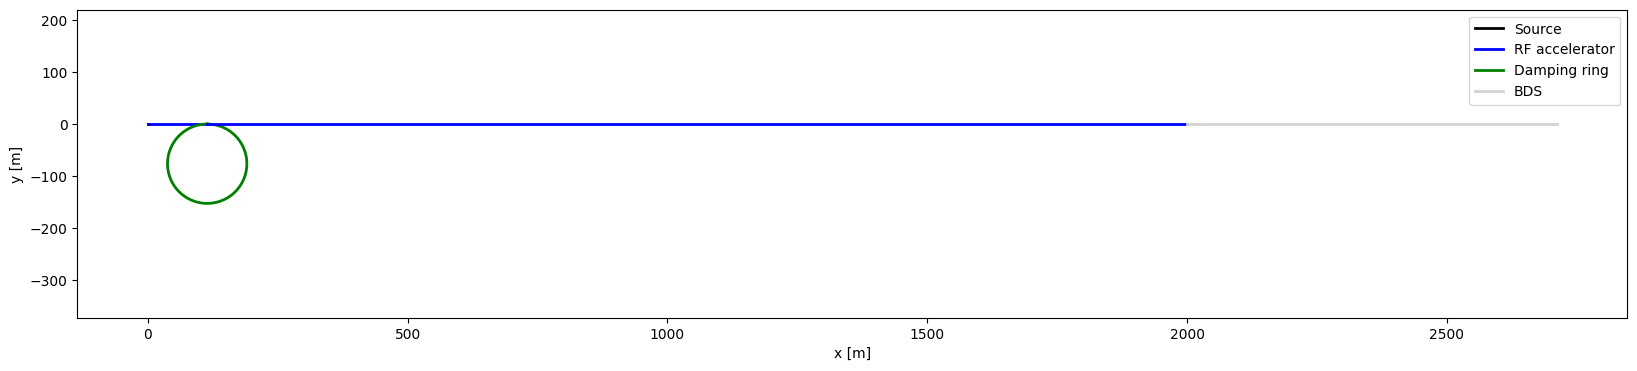

In [10]:
collider.linac2.plot_survey()

In [11]:
#return
collider.optimize('collider_optimization', 
                    parameters=[{'name': 'energy_asymmetry', 'type': 'range', 'bounds': [1.0, 4.0], 'log_scale': True, 'value_type': 'float'}, 
                                {'name': 'linac1.num_stages', 'type': 'range', 'bounds': [5, 50], 'log_scale': True, 'value_type': 'int'},
                               {'name': 'linac2.rf_accelerator.nom_accel_gradient', 'type': 'range', 'bounds': [1e6, 30e6], 'log_scale': True, 'value_type': 'float'},
                               {'name': 'linac1.driver_complex.rf_accelerator.nom_accel_gradient', 'type': 'range', 'bounds': [1e6, 30e6], 'log_scale': True, 'value_type': 'float'}], 
                    merit_fcn=Collider.full_programme_cost,
                    label='Collider cost', 
                    num_shots_per_step=2,
                    num_steps=30, parallel=False, overwrite=True)

[INFO 10-14 16:31:57] ax.service.utils.instantiation: Created search space: SearchSpace(parameters=[RangeParameter(name='energy_asymmetry', parameter_type=FLOAT, range=[1.0, 4.0], log_scale=True), RangeParameter(name='linac1.num_stages', parameter_type=INT, range=[5, 50], log_scale=True), RangeParameter(name='linac2.rf_accelerator.nom_accel_gradient', parameter_type=FLOAT, range=[1000000.0, 30000000.0], log_scale=True), RangeParameter(name='linac1.driver_complex.rf_accelerator.nom_accel_gradient', parameter_type=FLOAT, range=[1000000.0, 30000000.0], log_scale=True)], parameter_constraints=[]).
[INFO 10-14 16:31:57] ax.modelbridge.dispatch_utils: Using Models.BOTORCH_MODULAR since there are more ordered parameters than there are categories for the unordered categorical parameters.
[INFO 10-14 16:31:57] ax.modelbridge.dispatch_utils: Calculating the number of remaining initialization trials based on num_initialization_trials=None max_initialization_trials=None num_tunable_parameters=4 nu

>> SHOT 1/60
>> LINAC #1
>> SHOT 1/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  1.0%, ε = 161.8/0.5 mm-mrad
The structure gradient (56.9 MV/m) is too high (max 46.0 MV/m)
    ... #1  StageBasic #1           (s =  219.5 m) :   E =  44.1 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.1%, ε = 161.7/0.5 mm-mrad
    ... #2  InterstageBasic         (s =  229.6 m) :   E =  44.1 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.1%, ε = 161.7/0.5 mm-mrad
The structure gradient (56.9 MV/m) is too high (max 46.0 MV/m)
    ... #3  StageBasic #2           (s =  249.1 m) :   E =  83.1 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.1%, ε = 161.7/0.5 mm-mrad
    ... #4  InterstageBasic         (s =  262.9 m) :   E =  83.1 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.1%, ε = 161.7/0.5 mm-mrad
The structure gradient (56.9 MV/m) is too high (max 46.0 MV/m)
    ... #5  StageBasic #3           (s =  282.5 m) :   E = 122.2 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0

[INFO 10-14 16:32:00] ax.service.managed_loop: Running optimization trial 2...


>> SHOT 3/60
>> LINAC #1
>> SHOT 3/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.2 µm, σE =  1.1%, ε = 159.7/0.6 mm-mrad
    ... #1  StageBasic #1           (s =  209.8 m) :   E =  24.7 GeV, Q = -1.60 nC, σz =  17.2 µm, σE =  0.2%, ε = 159.9/0.6 mm-mrad
    ... #2  InterstageBasic         (s =  217.4 m) :   E =  24.7 GeV, Q = -1.60 nC, σz =  17.2 µm, σE =  0.2%, ε = 159.9/0.6 mm-mrad
    ... #3  StageBasic #2           (s =  227.2 m) :   E =  44.3 GeV, Q = -1.60 nC, σz =  17.2 µm, σE =  0.1%, ε = 159.9/0.6 mm-mrad
    ... #4  InterstageBasic         (s =  237.3 m) :   E =  44.3 GeV, Q = -1.60 nC, σz =  17.2 µm, σE =  0.1%, ε = 159.9/0.6 mm-mrad
    ... #5  StageBasic #3           (s =  247.1 m) :   E =  64.0 GeV, Q = -1.60 nC, σz =  17.2 µm, σE =  0.1%, ε = 160.0/0.6 mm-mrad
    ... #6  InterstageBasic         (s =  259.2 m) :   E =  64.0 GeV, Q = -1.60 nC, σz =  17.2 µm, σE =  0.1%, ε = 160.0/0.6 mm-mrad
    ... #7  StageBasic #4      

[INFO 10-14 16:32:02] ax.service.managed_loop: Running optimization trial 3...


>> SHOT 5/60
>> LINAC #1
>> SHOT 5/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  1.0%, ε = 160.1/0.5 mm-mrad
    ... #1  StageBasic #1           (s =  212.0 m) :   E =  28.9 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.2%, ε = 160.1/0.6 mm-mrad
    ... #2  InterstageBasic         (s =  220.1 m) :   E =  28.9 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.2%, ε = 160.1/0.6 mm-mrad
    ... #3  StageBasic #2           (s =  232.1 m) :   E =  52.8 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.1%, ε = 160.2/0.6 mm-mrad
    ... #4  InterstageBasic         (s =  243.1 m) :   E =  52.8 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.1%, ε = 160.2/0.6 mm-mrad
    ... #5  StageBasic #3           (s =  255.0 m) :   E =  76.7 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.1%, ε = 160.2/0.6 mm-mrad
    ... #6  InterstageBasic         (s =  268.3 m) :   E =  76.7 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.1%, ε = 160.2/0.6 mm-mrad
    ... #7  StageBasic #4      

[INFO 10-14 16:32:04] ax.service.managed_loop: Running optimization trial 4...


>> SHOT 7/60
>> LINAC #1
>> SHOT 7/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  1.0%, ε = 152.2/0.5 mm-mrad
    ... #1  StageBasic #1           (s =  209.4 m) :   E =  23.8 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.2%, ε = 152.2/0.5 mm-mrad
    ... #2  InterstageBasic         (s =  216.8 m) :   E =  23.8 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.2%, ε = 152.2/0.5 mm-mrad
    ... #3  StageBasic #2           (s =  226.2 m) :   E =  42.6 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.1%, ε = 152.3/0.5 mm-mrad
    ... #4  InterstageBasic         (s =  236.0 m) :   E =  42.6 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.1%, ε = 152.3/0.5 mm-mrad
    ... #5  StageBasic #3           (s =  245.4 m) :   E =  61.3 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.1%, ε = 152.3/0.5 mm-mrad
    ... #6  InterstageBasic         (s =  257.3 m) :   E =  61.3 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.1%, ε = 152.3/0.5 mm-mrad
    ... #7  StageBasic #4      

[INFO 10-14 16:32:06] ax.service.managed_loop: Running optimization trial 5...


>> SHOT 9/60
>> LINAC #1
>> SHOT 9/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.2 µm, σE =  1.0%, ε = 169.3/0.6 mm-mrad
    ... #1  StageBasic #1           (s =  202.2 m) :   E =   9.5 GeV, Q = -1.60 nC, σz =  17.2 µm, σE =  0.5%, ε = 169.5/0.6 mm-mrad
    ... #2  InterstageBasic         (s =  206.9 m) :   E =   9.5 GeV, Q = -1.60 nC, σz =  17.2 µm, σE =  0.5%, ε = 169.4/0.6 mm-mrad
    ... #3  StageBasic #2           (s =  209.2 m) :   E =  14.0 GeV, Q = -1.60 nC, σz =  17.2 µm, σE =  0.4%, ε = 169.5/0.6 mm-mrad
    ... #4  InterstageBasic         (s =  214.8 m) :   E =  14.0 GeV, Q = -1.60 nC, σz =  17.2 µm, σE =  0.4%, ε = 169.5/0.6 mm-mrad
    ... #5  StageBasic #3           (s =  217.1 m) :   E =  18.5 GeV, Q = -1.60 nC, σz =  17.2 µm, σE =  0.3%, ε = 169.4/0.6 mm-mrad
    ... #6  InterstageBasic         (s =  223.6 m) :   E =  18.5 GeV, Q = -1.60 nC, σz =  17.2 µm, σE =  0.3%, ε = 169.4/0.6 mm-mrad
    ... #7  StageBasic #4      

[INFO 10-14 16:32:10] ax.service.managed_loop: Running optimization trial 6...


>> SHOT 11/60
>> LINAC #1
>> SHOT 11/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.9%, ε = 155.1/0.6 mm-mrad
    ... #1  StageBasic #1           (s =  204.8 m) :   E =  14.6 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.3%, ε = 155.0/0.6 mm-mrad
    ... #2  InterstageBasic         (s =  210.6 m) :   E =  14.6 GeV, Q = -1.60 nC, σz =  18.5 µm, σE =  0.3%, ε = 155.0/0.6 mm-mrad
    ... #3  StageBasic #2           (s =  215.4 m) :   E =  24.2 GeV, Q = -1.60 nC, σz =  18.5 µm, σE =  0.2%, ε = 155.0/0.6 mm-mrad
    ... #4  InterstageBasic         (s =  222.8 m) :   E =  24.2 GeV, Q = -1.60 nC, σz =  18.5 µm, σE =  0.2%, ε = 155.0/0.6 mm-mrad
    ... #5  StageBasic #3           (s =  227.6 m) :   E =  33.7 GeV, Q = -1.60 nC, σz =  18.5 µm, σE =  0.1%, ε = 155.0/0.6 mm-mrad
    ... #6  InterstageBasic         (s =  236.4 m) :   E =  33.7 GeV, Q = -1.60 nC, σz =  18.5 µm, σE =  0.1%, ε = 155.0/0.6 mm-mrad
    ... #7  StageBasic #4    

[INFO 10-14 16:32:17] ax.service.managed_loop: Running optimization trial 7...


>> SHOT 13/60
>> LINAC #1
>> SHOT 13/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  1.0%, ε = 156.6/0.6 mm-mrad
    ... #1  StageBasic #1           (s =  210.9 m) :   E =  26.7 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.2%, ε = 156.7/0.6 mm-mrad
    ... #2  InterstageBasic         (s =  218.7 m) :   E =  26.7 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.2%, ε = 156.7/0.6 mm-mrad
    ... #3  StageBasic #2           (s =  229.6 m) :   E =  48.5 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.1%, ε = 156.8/0.6 mm-mrad
    ... #4  InterstageBasic         (s =  240.1 m) :   E =  48.5 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.1%, ε = 156.9/0.6 mm-mrad
    ... #5  StageBasic #3           (s =  251.0 m) :   E =  70.2 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.1%, ε = 156.9/0.6 mm-mrad
    ... #6  InterstageBasic         (s =  263.7 m) :   E =  70.2 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.1%, ε = 156.9/0.6 mm-mrad
    ... #7  StageBasic #4    

[INFO 10-14 16:32:19] ax.service.managed_loop: Running optimization trial 8...


>> SHOT 15/60
>> LINAC #1
>> SHOT 15/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.3 µm, σE =  1.0%, ε = 164.9/0.6 mm-mrad
    ... #1  StageBasic #1           (s =  222.6 m) :   E =  50.2 GeV, Q = -1.60 nC, σz =  17.3 µm, σE =  0.1%, ε = 164.9/0.6 mm-mrad
    ... #2  InterstageBasic         (s =  233.3 m) :   E =  50.2 GeV, Q = -1.60 nC, σz =  17.3 µm, σE =  0.1%, ε = 164.9/0.6 mm-mrad
    ... #3  StageBasic #2           (s =  255.9 m) :   E =  95.4 GeV, Q = -1.60 nC, σz =  17.3 µm, σE =  0.1%, ε = 165.0/0.6 mm-mrad
    ... #4  InterstageBasic         (s =  270.7 m) :   E =  95.4 GeV, Q = -1.60 nC, σz =  17.3 µm, σE =  0.1%, ε = 165.0/0.6 mm-mrad
    ... #5  StageBasic #3           (s =  293.3 m) :   E = 140.6 GeV, Q = -1.60 nC, σz =  17.3 µm, σE =  0.0%, ε = 165.1/0.6 mm-mrad
    ... #6  InterstageBasic         (s =  311.3 m) :   E = 140.6 GeV, Q = -1.60 nC, σz =  17.3 µm, σE =  0.0%, ε = 165.1/0.6 mm-mrad
    ... #7  StageBasic #4    

[INFO 10-14 16:32:21] ax.service.managed_loop: Running optimization trial 9...


>> SHOT 17/60
>> LINAC #1
>> SHOT 17/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  1.0%, ε = 162.6/0.5 mm-mrad
    ... #1  StageBasic #1           (s =  205.8 m) :   E =  16.6 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.3%, ε = 162.8/0.5 mm-mrad
    ... #2  InterstageBasic         (s =  212.0 m) :   E =  16.6 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.3%, ε = 162.8/0.5 mm-mrad
    ... #3  StageBasic #2           (s =  217.8 m) :   E =  28.3 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.2%, ε = 162.8/0.5 mm-mrad
    ... #4  InterstageBasic         (s =  225.8 m) :   E =  28.3 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.2%, ε = 162.8/0.5 mm-mrad
    ... #5  StageBasic #3           (s =  231.7 m) :   E =  39.9 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.1%, ε = 162.8/0.5 mm-mrad
    ... #6  InterstageBasic         (s =  241.2 m) :   E =  39.9 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.1%, ε = 162.8/0.5 mm-mrad
    ... #7  StageBasic #4    

[INFO 10-14 16:32:26] ax.service.managed_loop: Running optimization trial 10...


>> SHOT 19/60
>> LINAC #1
>> SHOT 19/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  1.0%, ε = 160.7/0.6 mm-mrad
    ... #1  StageBasic #1           (s =  213.1 m) :   E =  31.1 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.2%, ε = 160.7/0.6 mm-mrad
    ... #2  InterstageBasic         (s =  221.5 m) :   E =  31.1 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.2%, ε = 160.7/0.6 mm-mrad
    ... #3  StageBasic #2           (s =  234.6 m) :   E =  57.2 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.1%, ε = 160.7/0.6 mm-mrad
    ... #4  InterstageBasic         (s =  246.0 m) :   E =  57.2 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.1%, ε = 160.7/0.6 mm-mrad
    ... #5  StageBasic #3           (s =  259.1 m) :   E =  83.4 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.1%, ε = 160.7/0.6 mm-mrad
    ... #6  InterstageBasic         (s =  272.9 m) :   E =  83.4 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.1%, ε = 160.7/0.6 mm-mrad
    ... #7  StageBasic #4    

[INFO 10-14 16:32:30] ax.service.managed_loop: Running optimization trial 11...


>> SHOT 21/60
>> LINAC #1
>> SHOT 21/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  1.0%, ε = 161.5/0.5 mm-mrad
    ... #1  StageBasic #1           (s =  210.6 m) :   E =  26.2 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.2%, ε = 161.5/0.5 mm-mrad
    ... #2  InterstageBasic         (s =  218.3 m) :   E =  26.2 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.2%, ε = 161.5/0.5 mm-mrad
    ... #3  StageBasic #2           (s =  228.9 m) :   E =  47.4 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.1%, ε = 161.6/0.5 mm-mrad
    ... #4  InterstageBasic         (s =  239.4 m) :   E =  47.4 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.1%, ε = 161.6/0.5 mm-mrad
    ... #5  StageBasic #3           (s =  249.9 m) :   E =  68.6 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.1%, ε = 161.6/0.5 mm-mrad
    ... #6  InterstageBasic         (s =  262.5 m) :   E =  68.6 GeV, Q = -1.60 nC, σz =  18.0 µm, σE =  0.1%, ε = 161.6/0.5 mm-mrad
    ... #7  StageBasic #4    

[INFO 10-14 16:32:34] ax.service.managed_loop: Running optimization trial 12...
[INFO 10-14 16:32:35] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping


>> SHOT 23/60
>> LINAC #1
>> SHOT 23/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  1.0%, ε = 159.6/0.5 mm-mrad
    ... #1  StageBasic #1           (s =  208.9 m) :   E =  22.7 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.2%, ε = 159.5/0.6 mm-mrad
    ... #2  InterstageBasic         (s =  216.1 m) :   E =  22.7 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.2%, ε = 159.5/0.6 mm-mrad
    ... #3  StageBasic #2           (s =  224.9 m) :   E =  40.5 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.1%, ε = 159.5/0.6 mm-mrad
    ... #4  InterstageBasic         (s =  234.6 m) :   E =  40.5 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.1%, ε = 159.5/0.6 mm-mrad
    ... #5  StageBasic #3           (s =  243.4 m) :   E =  58.2 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.1%, ε = 159.5/0.6 mm-mrad
    ... #6  InterstageBasic         (s =  255.0 m) :   E =  58.2 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.1%, ε = 159.5/0.6 mm-mrad
    ... #7  StageBasic #4    

[INFO 10-14 16:32:39] ax.service.managed_loop: Running optimization trial 13...
[INFO 10-14 16:32:40] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping
[INFO 10-14 16:32:40] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping


>> SHOT 25/60
>> LINAC #1
>> SHOT 25/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  1.0%, ε = 159.7/0.6 mm-mrad
    ... #1  StageBasic #1           (s =  213.9 m) :   E =  32.7 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.2%, ε = 159.8/0.6 mm-mrad
    ... #2  InterstageBasic         (s =  222.5 m) :   E =  32.7 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.2%, ε = 159.8/0.6 mm-mrad
    ... #3  StageBasic #2           (s =  236.4 m) :   E =  60.4 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.1%, ε = 159.8/0.6 mm-mrad
    ... #4  InterstageBasic         (s =  248.1 m) :   E =  60.4 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.1%, ε = 159.8/0.6 mm-mrad
    ... #5  StageBasic #3           (s =  262.0 m) :   E =  88.1 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.1%, ε = 159.8/0.6 mm-mrad
    ... #6  InterstageBasic         (s =  276.2 m) :   E =  88.1 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.1%, ε = 159.8/0.6 mm-mrad
    ... #7  StageBasic #4    

[INFO 10-14 16:32:43] ax.service.managed_loop: Running optimization trial 14...
[INFO 10-14 16:32:44] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping
[INFO 10-14 16:32:44] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping


>> SHOT 27/60
>> LINAC #1
>> SHOT 27/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  1.0%, ε = 155.1/0.6 mm-mrad
    ... #1  StageBasic #1           (s =  209.0 m) :   E =  23.0 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.2%, ε = 155.0/0.6 mm-mrad
    ... #2  InterstageBasic         (s =  216.3 m) :   E =  23.0 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.2%, ε = 155.0/0.6 mm-mrad
    ... #3  StageBasic #2           (s =  225.3 m) :   E =  41.1 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.1%, ε = 155.0/0.6 mm-mrad
    ... #4  InterstageBasic         (s =  235.0 m) :   E =  41.1 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.1%, ε = 155.0/0.6 mm-mrad
    ... #5  StageBasic #3           (s =  244.0 m) :   E =  59.2 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.1%, ε = 155.0/0.6 mm-mrad
    ... #6  InterstageBasic         (s =  255.7 m) :   E =  59.2 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.1%, ε = 155.0/0.6 mm-mrad
    ... #7  StageBasic #4    

[INFO 10-14 16:32:47] ax.service.managed_loop: Running optimization trial 15...
[INFO 10-14 16:32:48] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping
[INFO 10-14 16:32:48] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping


>> SHOT 29/60
>> LINAC #1
>> SHOT 29/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  1.0%, ε = 148.8/0.6 mm-mrad
    ... #1  StageBasic #1           (s =  211.9 m) :   E =  28.7 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.2%, ε = 148.8/0.6 mm-mrad
    ... #2  InterstageBasic         (s =  220.0 m) :   E =  28.7 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.2%, ε = 148.8/0.6 mm-mrad
    ... #3  StageBasic #2           (s =  231.8 m) :   E =  52.4 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.1%, ε = 148.8/0.6 mm-mrad
    ... #4  InterstageBasic         (s =  242.8 m) :   E =  52.4 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.1%, ε = 148.8/0.6 mm-mrad
    ... #5  StageBasic #3           (s =  254.6 m) :   E =  76.1 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.1%, ε = 148.8/0.6 mm-mrad
    ... #6  InterstageBasic         (s =  267.8 m) :   E =  76.1 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.1%, ε = 148.8/0.6 mm-mrad
    ... #7  StageBasic #4    

[INFO 10-14 16:32:52] ax.service.managed_loop: Running optimization trial 16...
[INFO 10-14 16:32:53] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping


>> SHOT 31/60
>> LINAC #1
>> SHOT 31/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  1.0%, ε = 162.9/0.6 mm-mrad
    ... #1  StageBasic #1           (s =  214.8 m) :   E =  34.6 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.1%, ε = 162.8/0.6 mm-mrad
    ... #2  InterstageBasic         (s =  223.7 m) :   E =  34.6 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.1%, ε = 162.8/0.6 mm-mrad
    ... #3  StageBasic #2           (s =  238.5 m) :   E =  64.2 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.1%, ε = 162.8/0.6 mm-mrad
    ... #4  InterstageBasic         (s =  250.6 m) :   E =  64.2 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.1%, ε = 162.8/0.6 mm-mrad
    ... #5  StageBasic #3           (s =  265.4 m) :   E =  93.8 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.1%, ε = 162.8/0.6 mm-mrad
    ... #6  InterstageBasic         (s =  280.1 m) :   E =  93.8 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.1%, ε = 162.8/0.6 mm-mrad
    ... #7  StageBasic #4    

[INFO 10-14 16:32:57] ax.service.managed_loop: Running optimization trial 17...
[INFO 10-14 16:32:57] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping
[INFO 10-14 16:32:57] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping


>> SHOT 33/60
>> LINAC #1
>> SHOT 33/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  1.0%, ε = 157.2/0.5 mm-mrad
    ... #1  StageBasic #1           (s =  205.2 m) :   E =  15.4 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.3%, ε = 157.3/0.5 mm-mrad
    ... #2  InterstageBasic         (s =  211.1 m) :   E =  15.4 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.3%, ε = 157.3/0.5 mm-mrad
    ... #3  StageBasic #2           (s =  216.3 m) :   E =  25.7 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.2%, ε = 157.3/0.5 mm-mrad
    ... #4  InterstageBasic         (s =  224.0 m) :   E =  25.7 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.2%, ε = 157.3/0.5 mm-mrad
    ... #5  StageBasic #3           (s =  229.2 m) :   E =  36.1 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.1%, ε = 157.3/0.5 mm-mrad
    ... #6  InterstageBasic         (s =  238.2 m) :   E =  36.1 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.1%, ε = 157.4/0.5 mm-mrad
    ... #7  StageBasic #4    

[INFO 10-14 16:33:06] ax.service.managed_loop: Running optimization trial 18...
[INFO 10-14 16:33:07] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping


>> SHOT 35/60
>> LINAC #1
>> SHOT 35/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.4 µm, σE =  1.0%, ε = 153.0/0.6 mm-mrad
    ... #1  StageBasic #1           (s =  207.0 m) :   E =  19.1 GeV, Q = -1.60 nC, σz =  17.4 µm, σE =  0.3%, ε = 153.2/0.6 mm-mrad
    ... #2  InterstageBasic         (s =  213.6 m) :   E =  19.1 GeV, Q = -1.60 nC, σz =  17.4 µm, σE =  0.3%, ε = 153.2/0.6 mm-mrad
    ... #3  StageBasic #2           (s =  220.7 m) :   E =  33.1 GeV, Q = -1.60 nC, σz =  17.4 µm, σE =  0.1%, ε = 153.2/0.6 mm-mrad
    ... #4  InterstageBasic         (s =  229.4 m) :   E =  33.1 GeV, Q = -1.60 nC, σz =  17.4 µm, σE =  0.1%, ε = 153.2/0.6 mm-mrad
    ... #5  StageBasic #3           (s =  236.4 m) :   E =  47.2 GeV, Q = -1.60 nC, σz =  17.4 µm, σE =  0.1%, ε = 153.2/0.6 mm-mrad
    ... #6  InterstageBasic         (s =  246.8 m) :   E =  47.2 GeV, Q = -1.60 nC, σz =  17.4 µm, σE =  0.1%, ε = 153.2/0.6 mm-mrad
    ... #7  StageBasic #4    

[INFO 10-14 16:33:14] ax.service.managed_loop: Running optimization trial 19...
[INFO 10-14 16:33:15] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping
[INFO 10-14 16:33:15] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping


>> SHOT 37/60
>> LINAC #1
>> SHOT 37/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  1.0%, ε = 155.4/0.6 mm-mrad
    ... #1  StageBasic #1           (s =  204.1 m) :   E =  13.2 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.4%, ε = 155.2/0.6 mm-mrad
    ... #2  InterstageBasic         (s =  209.6 m) :   E =  13.2 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.4%, ε = 155.2/0.6 mm-mrad
    ... #3  StageBasic #2           (s =  213.6 m) :   E =  21.3 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.2%, ε = 155.1/0.6 mm-mrad
    ... #4  InterstageBasic         (s =  220.6 m) :   E =  21.3 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.2%, ε = 155.1/0.6 mm-mrad
    ... #5  StageBasic #3           (s =  224.7 m) :   E =  29.5 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.2%, ε = 155.1/0.6 mm-mrad
    ... #6  InterstageBasic         (s =  232.9 m) :   E =  29.5 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.2%, ε = 155.1/0.6 mm-mrad
    ... #7  StageBasic #4    

[INFO 10-14 16:33:22] ax.service.managed_loop: Running optimization trial 20...
[INFO 10-14 16:33:23] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping
[INFO 10-14 16:33:23] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping
[INFO 10-14 16:33:23] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping


>> SHOT 39/60
>> LINAC #1
>> SHOT 39/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  1.0%, ε = 152.9/0.5 mm-mrad
The structure gradient (60.0 MV/m) is too high (max 45.6 MV/m)
    ... #1  StageBasic #1           (s =  205.8 m) :   E =  16.5 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.3%, ε = 152.9/0.6 mm-mrad
    ... #2  InterstageBasic         (s =  211.9 m) :   E =  16.5 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.3%, ε = 152.9/0.6 mm-mrad
The structure gradient (60.0 MV/m) is too high (max 45.6 MV/m)
    ... #3  StageBasic #2           (s =  217.7 m) :   E =  28.0 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.2%, ε = 152.9/0.6 mm-mrad
    ... #4  InterstageBasic         (s =  225.7 m) :   E =  28.0 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.2%, ε = 152.9/0.6 mm-mrad
The structure gradient (60.0 MV/m) is too high (max 45.6 MV/m)
    ... #5  StageBasic #3           (s =  231.4 m) :   E =  39.5 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0

[INFO 10-14 16:33:31] ax.service.managed_loop: Running optimization trial 21...
[INFO 10-14 16:33:32] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping
[INFO 10-14 16:33:32] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping


>> SHOT 41/60
>> LINAC #1
>> SHOT 41/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  1.0%, ε = 161.8/0.5 mm-mrad
    ... #1  StageBasic #1           (s =  204.4 m) :   E =  13.9 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.4%, ε = 162.1/0.5 mm-mrad
    ... #2  InterstageBasic         (s =  210.1 m) :   E =  13.9 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.4%, ε = 162.1/0.5 mm-mrad
    ... #3  StageBasic #2           (s =  214.5 m) :   E =  22.7 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.2%, ε = 162.1/0.5 mm-mrad
    ... #4  InterstageBasic         (s =  221.7 m) :   E =  22.7 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.2%, ε = 162.1/0.5 mm-mrad
    ... #5  StageBasic #3           (s =  226.2 m) :   E =  31.6 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.2%, ε = 162.2/0.5 mm-mrad
    ... #6  InterstageBasic         (s =  234.7 m) :   E =  31.6 GeV, Q = -1.60 nC, σz =  18.3 µm, σE =  0.2%, ε = 162.2/0.5 mm-mrad
    ... #7  StageBasic #4    

[INFO 10-14 16:33:42] ax.service.managed_loop: Running optimization trial 22...
[INFO 10-14 16:33:44] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping
[INFO 10-14 16:33:44] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping


>> SHOT 43/60
>> LINAC #1
>> SHOT 43/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  1.0%, ε = 162.5/0.6 mm-mrad
The structure gradient (61.0 MV/m) is too high (max 46.1 MV/m)
    ... #1  StageBasic #1           (s =  206.4 m) :   E =  17.8 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.3%, ε = 162.7/0.6 mm-mrad
    ... #2  InterstageBasic         (s =  212.8 m) :   E =  17.8 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.3%, ε = 162.7/0.6 mm-mrad
The structure gradient (61.0 MV/m) is too high (max 46.1 MV/m)
    ... #3  StageBasic #2           (s =  219.1 m) :   E =  30.5 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.2%, ε = 162.7/0.6 mm-mrad
    ... #4  InterstageBasic         (s =  227.5 m) :   E =  30.5 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.2%, ε = 162.7/0.6 mm-mrad
The structure gradient (61.0 MV/m) is too high (max 46.1 MV/m)
    ... #5  StageBasic #3           (s =  233.9 m) :   E =  43.2 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0

[INFO 10-14 16:33:49] ax.service.managed_loop: Running optimization trial 23...
[INFO 10-14 16:33:51] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping


>> SHOT 45/60
>> LINAC #1
>> SHOT 45/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  1.0%, ε = 147.5/0.6 mm-mrad
    ... #1  StageBasic #1           (s =  204.5 m) :   E =  14.0 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.4%, ε = 147.5/0.6 mm-mrad
    ... #2  InterstageBasic         (s =  210.2 m) :   E =  14.0 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.4%, ε = 147.5/0.6 mm-mrad
    ... #3  StageBasic #2           (s =  214.7 m) :   E =  23.0 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.2%, ε = 147.5/0.6 mm-mrad
    ... #4  InterstageBasic         (s =  221.9 m) :   E =  23.0 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.2%, ε = 147.5/0.6 mm-mrad
    ... #5  StageBasic #3           (s =  226.4 m) :   E =  32.0 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.2%, ε = 147.5/0.6 mm-mrad
    ... #6  InterstageBasic         (s =  235.0 m) :   E =  32.0 GeV, Q = -1.60 nC, σz =  17.9 µm, σE =  0.2%, ε = 147.5/0.6 mm-mrad
    ... #7  StageBasic #4    

[INFO 10-14 16:34:01] ax.service.managed_loop: Running optimization trial 24...
[INFO 10-14 16:34:02] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping


>> SHOT 47/60
>> LINAC #1
>> SHOT 47/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  1.0%, ε = 161.4/0.6 mm-mrad
    ... #1  StageBasic #1           (s =  204.9 m) :   E =  14.9 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  0.3%, ε = 161.4/0.6 mm-mrad
    ... #2  InterstageBasic         (s =  210.8 m) :   E =  14.9 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  0.3%, ε = 161.4/0.6 mm-mrad
    ... #3  StageBasic #2           (s =  215.7 m) :   E =  24.8 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  0.2%, ε = 161.5/0.6 mm-mrad
    ... #4  InterstageBasic         (s =  223.3 m) :   E =  24.8 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  0.2%, ε = 161.5/0.6 mm-mrad
    ... #5  StageBasic #3           (s =  228.2 m) :   E =  34.7 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  0.1%, ε = 161.5/0.6 mm-mrad
    ... #6  InterstageBasic         (s =  237.2 m) :   E =  34.7 GeV, Q = -1.60 nC, σz =  18.2 µm, σE =  0.1%, ε = 161.5/0.6 mm-mrad
    ... #7  StageBasic #4    

[INFO 10-14 16:34:13] ax.service.managed_loop: Running optimization trial 25...
[INFO 10-14 16:34:14] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping


>> SHOT 49/60
>> LINAC #1
>> SHOT 49/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  1.0%, ε = 161.6/0.5 mm-mrad
The structure gradient (54.2 MV/m) is too high (max 46.2 MV/m)
    ... #1  StageBasic #1           (s =  207.7 m) :   E =  20.5 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.2%, ε = 161.6/0.5 mm-mrad
    ... #2  InterstageBasic         (s =  214.6 m) :   E =  20.5 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.2%, ε = 161.6/0.5 mm-mrad
The structure gradient (54.2 MV/m) is too high (max 46.2 MV/m)
    ... #3  StageBasic #2           (s =  222.3 m) :   E =  35.9 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.1%, ε = 161.4/0.6 mm-mrad
    ... #4  InterstageBasic         (s =  231.4 m) :   E =  35.9 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.1%, ε = 161.4/0.6 mm-mrad
The structure gradient (54.2 MV/m) is too high (max 46.2 MV/m)
    ... #5  StageBasic #3           (s =  239.1 m) :   E =  51.4 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0

[INFO 10-14 16:34:24] ax.service.managed_loop: Running optimization trial 26...
[INFO 10-14 16:34:25] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping
[INFO 10-14 16:34:25] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping
[INFO 10-14 16:34:25] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping


>> SHOT 51/60
>> LINAC #1
>> SHOT 51/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  1.0%, ε = 157.7/0.6 mm-mrad
    ... #1  StageBasic #1           (s =  206.0 m) :   E =  17.0 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.3%, ε = 157.7/0.6 mm-mrad
    ... #2  InterstageBasic         (s =  212.2 m) :   E =  17.0 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.3%, ε = 157.7/0.6 mm-mrad
    ... #3  StageBasic #2           (s =  218.2 m) :   E =  29.0 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.2%, ε = 157.7/0.6 mm-mrad
    ... #4  InterstageBasic         (s =  226.4 m) :   E =  29.0 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.2%, ε = 157.7/0.6 mm-mrad
    ... #5  StageBasic #3           (s =  232.4 m) :   E =  41.0 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.1%, ε = 157.7/0.6 mm-mrad
    ... #6  InterstageBasic         (s =  242.1 m) :   E =  41.0 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.1%, ε = 157.7/0.6 mm-mrad
    ... #7  StageBasic #4    

[INFO 10-14 16:34:33] ax.service.managed_loop: Running optimization trial 27...
[INFO 10-14 16:34:33] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping
[INFO 10-14 16:34:33] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping
[INFO 10-14 16:34:33] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping


>> SHOT 53/60
>> LINAC #1
>> SHOT 53/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  1.0%, ε = 161.7/0.6 mm-mrad
    ... #1  StageBasic #1           (s =  204.9 m) :   E =  14.9 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.3%, ε = 161.9/0.6 mm-mrad
    ... #2  InterstageBasic         (s =  210.8 m) :   E =  14.9 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.3%, ε = 161.9/0.6 mm-mrad
    ... #3  StageBasic #2           (s =  215.7 m) :   E =  24.8 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.2%, ε = 161.9/0.6 mm-mrad
    ... #4  InterstageBasic         (s =  223.3 m) :   E =  24.8 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.2%, ε = 161.9/0.6 mm-mrad
    ... #5  StageBasic #3           (s =  228.2 m) :   E =  34.7 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.1%, ε = 161.9/0.6 mm-mrad
    ... #6  InterstageBasic         (s =  237.2 m) :   E =  34.7 GeV, Q = -1.60 nC, σz =  17.6 µm, σE =  0.1%, ε = 161.9/0.6 mm-mrad
    ... #7  StageBasic #4    

[INFO 10-14 16:34:41] ax.service.managed_loop: Running optimization trial 28...
[INFO 10-14 16:34:42] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping
[INFO 10-14 16:34:42] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping
[INFO 10-14 16:34:42] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping
[INFO 10-14 16:34:42] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping


>> SHOT 55/60
>> LINAC #1
>> SHOT 55/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  1.0%, ε = 158.5/0.6 mm-mrad
The structure gradient (428.4 MV/m) is too high (max 45.7 MV/m)
    ... #1  StageBasic #1           (s =  249.5 m) :   E = 104.0 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε = 158.4/0.6 mm-mrad
    ... #2  InterstageBasic         (s =  264.9 m) :   E = 104.0 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε = 158.4/0.6 mm-mrad
The structure gradient (428.4 MV/m) is too high (max 45.7 MV/m)
    ... #3  StageBasic #2           (s =  314.4 m) :   E = 203.0 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε = 158.4/0.6 mm-mrad
    ... #4  InterstageBasic         (s =  336.0 m) :   E = 203.0 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =  0.0%, ε = 158.4/0.6 mm-mrad
The structure gradient (428.4 MV/m) is too high (max 45.7 MV/m)
    ... #5  StageBasic #3           (s =  385.5 m) :   E = 302.0 GeV, Q = -1.60 nC, σz =  17.5 µm, σE =

[INFO 10-14 16:34:47] ax.service.managed_loop: Running optimization trial 29...
/pfs/lustrep2/scratch/project_465000445/carlal/pyvenv/lib/python3.9/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
[INFO 10-14 16:34:48] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping
[INFO 10-14 16:34:48] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping
[INFO 10-14 16:34:48] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping


>> SHOT 57/60
>> LINAC #1
>> SHOT 57/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  1.0%, ε = 157.1/0.6 mm-mrad
    ... #1  StageBasic #1           (s =  204.9 m) :   E =  14.9 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.3%, ε = 157.3/0.6 mm-mrad
    ... #2  InterstageBasic         (s =  210.8 m) :   E =  14.9 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.3%, ε = 157.3/0.6 mm-mrad
    ... #3  StageBasic #2           (s =  215.7 m) :   E =  24.8 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.2%, ε = 157.2/0.6 mm-mrad
    ... #4  InterstageBasic         (s =  223.3 m) :   E =  24.8 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.2%, ε = 157.2/0.6 mm-mrad
    ... #5  StageBasic #3           (s =  228.2 m) :   E =  34.7 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.1%, ε = 157.2/0.6 mm-mrad
    ... #6  InterstageBasic         (s =  237.2 m) :   E =  34.7 GeV, Q = -1.60 nC, σz =  18.4 µm, σE =  0.1%, ε = 157.2/0.6 mm-mrad
    ... #7  StageBasic #4    

[INFO 10-14 16:34:57] ax.service.managed_loop: Running optimization trial 30...
[INFO 10-14 16:34:58] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping
[INFO 10-14 16:34:58] ax.modelbridge.base: Untransformed parameter 30000000.00000001 greater than upper bound 30000000.0, clamping


>> SHOT 59/60
>> LINAC #1
>> SHOT 59/60
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.6 µm, σE =  1.0%, ε = 158.6/0.5 mm-mrad
The structure gradient (47.0 MV/m) is too high (max 46.1 MV/m)
    ... #1  StageBasic #1           (s =  207.3 m) :   E =  19.6 GeV, Q = -1.60 nC, σz =  18.6 µm, σE =  0.3%, ε = 158.7/0.6 mm-mrad
    ... #2  InterstageBasic         (s =  214.0 m) :   E =  19.6 GeV, Q = -1.60 nC, σz =  18.6 µm, σE =  0.3%, ε = 158.7/0.6 mm-mrad
The structure gradient (47.0 MV/m) is too high (max 46.1 MV/m)
    ... #3  StageBasic #2           (s =  221.3 m) :   E =  34.1 GeV, Q = -1.60 nC, σz =  18.6 µm, σE =  0.1%, ε = 158.6/0.6 mm-mrad
    ... #4  InterstageBasic         (s =  230.1 m) :   E =  34.1 GeV, Q = -1.60 nC, σz =  18.6 µm, σE =  0.1%, ε = 158.6/0.6 mm-mrad
The structure gradient (47.0 MV/m) is too high (max 46.1 MV/m)
    ... #5  StageBasic #3           (s =  237.4 m) :   E =  48.7 GeV, Q = -1.60 nC, σz =  18.6 µm, σE =  0

({'energy_asymmetry': 4.0,
  'linac1.num_stages': 50,
  'linac2.rf_accelerator.nom_accel_gradient': 30000000.00000001,
  'linac1.driver_complex.rf_accelerator.nom_accel_gradient': 30000000.00000001},
 ({'objective': 264918310.48150957},
  {'objective': {'objective': 44809057547788.41}}))

### Plot the wakefield structure

In [12]:
# plot wakefield
elinac.stage.plot_wake()

No wake calculated


### Plot the beam evolution in the linac

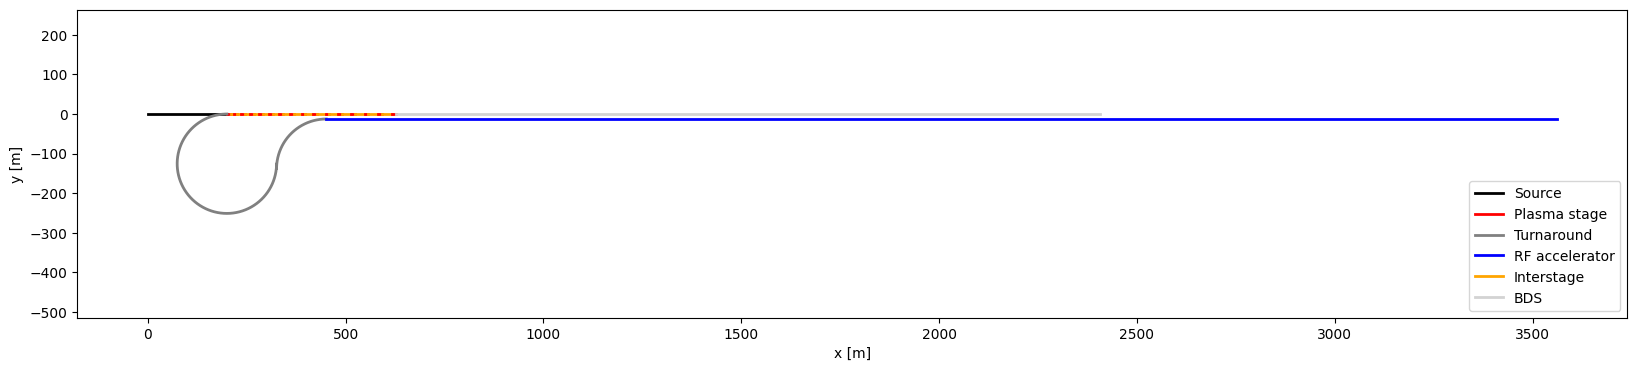

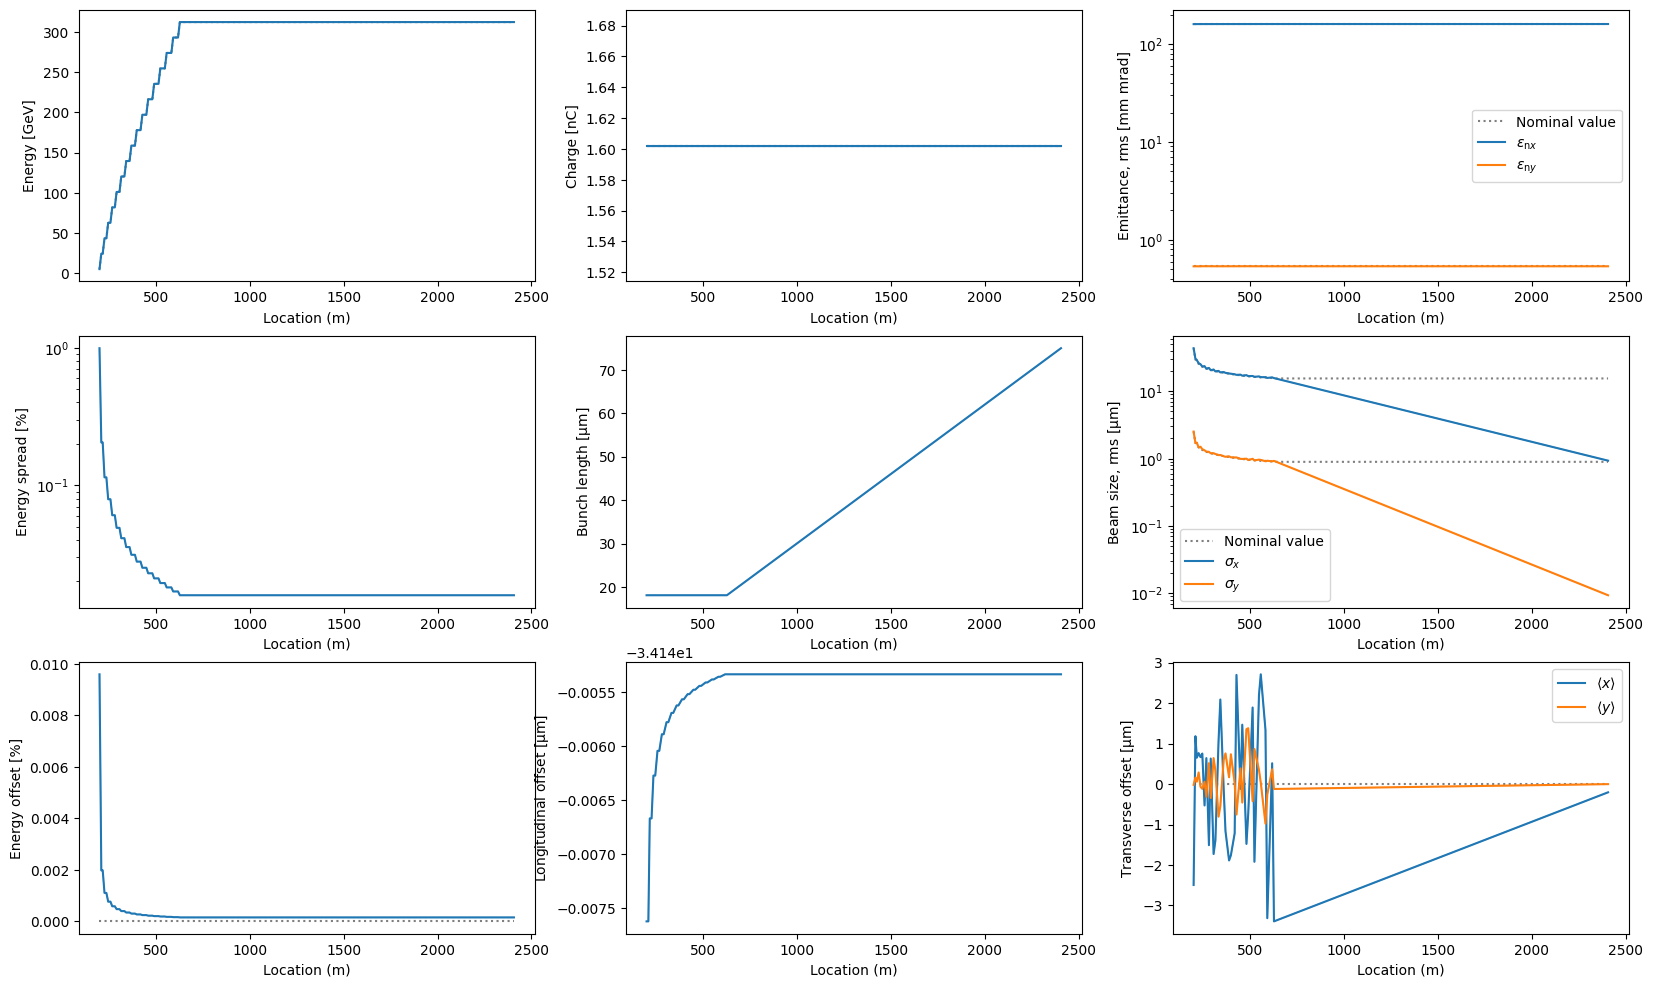

In [13]:
# plot beam evolution and linac survey
elinac.plot_survey()
elinac.plot_evolution(use_stage_nums=False)

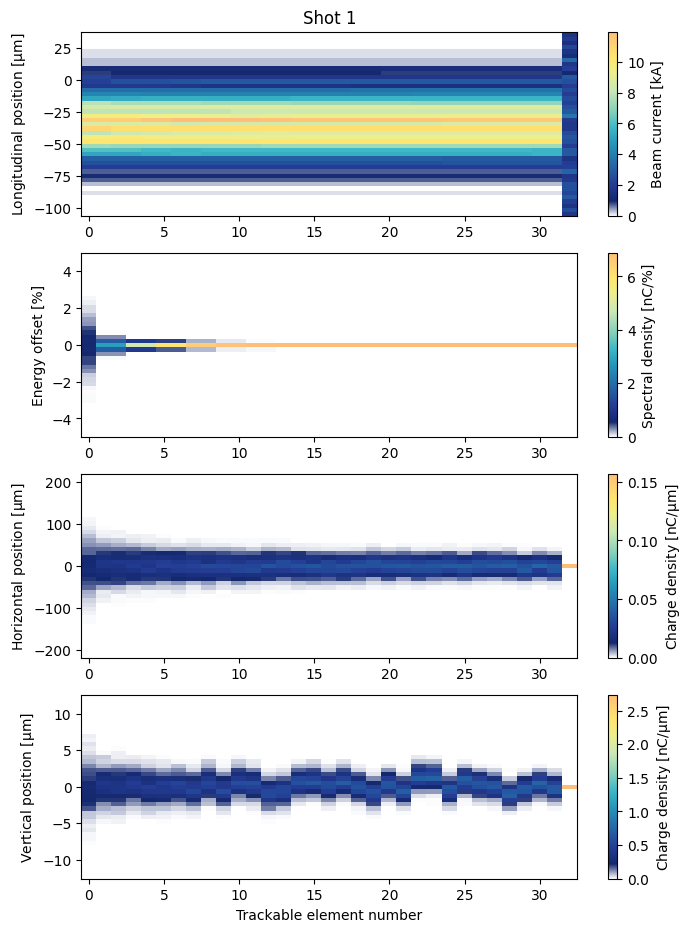

In [14]:
elinac.plot_waterfalls()

### Plot the collider luminosity

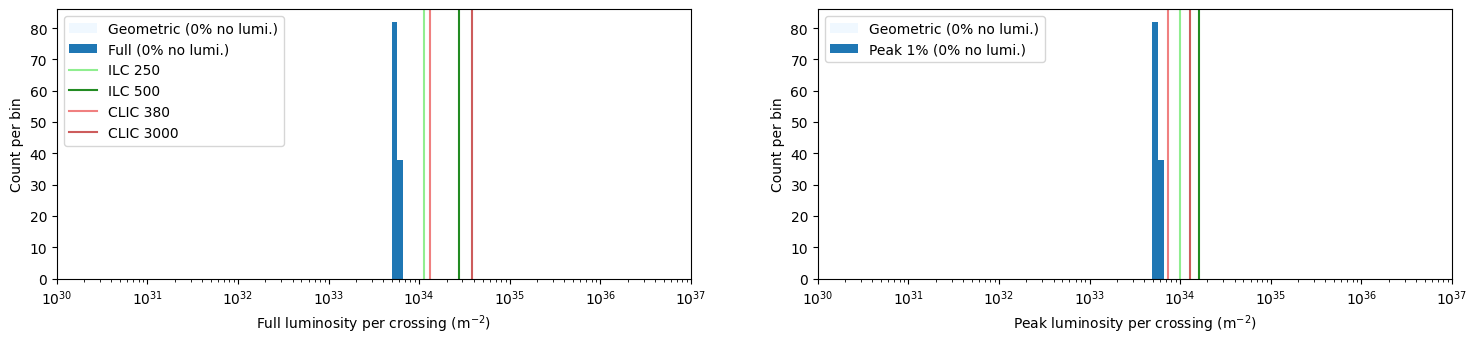

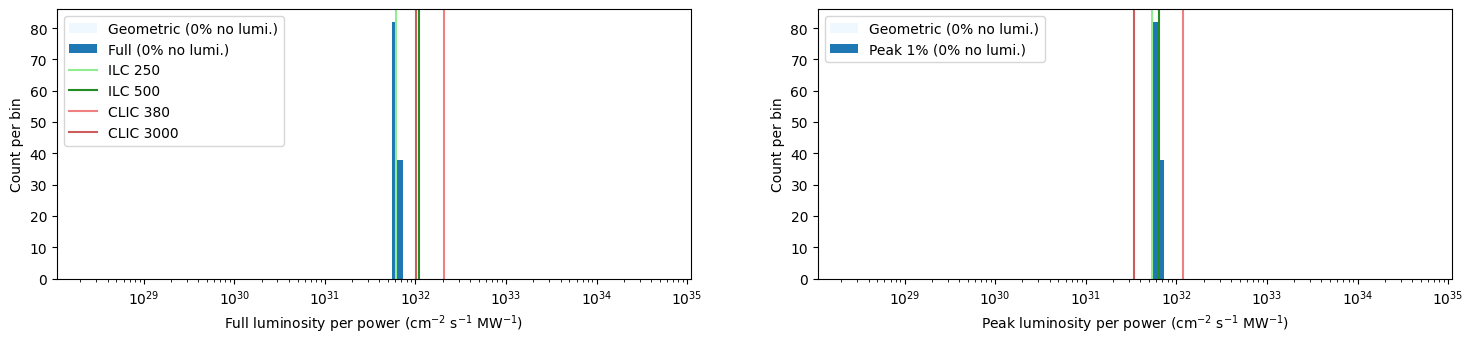

In [15]:
# plot luminosity
collider.plot_luminosity()

# plot luminosity per power
collider.plot_luminosity_per_power()